In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading the data
data = pd.read_csv("mammographic_masses.data.txt")
data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [10]:
#passing in column names
data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [11]:
#number of rows and columns
data.shape

(961, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
age         956 non-null float64
shape       930 non-null float64
margin      913 non-null float64
density     885 non-null float64
severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [13]:
data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [16]:
data.columns

Index(['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [ ]:
#dropping the column not necessarily required
data.drop(columns=["BI-RADS"])

In [23]:
data.head()

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [26]:
#sum of the null values
data.isnull().sum()

age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

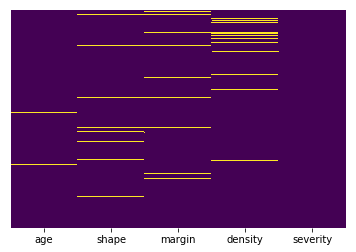

In [31]:
#visualize the null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [39]:
data.columns

Index(['age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [40]:
#filling in the null values
data["shape"]=data["shape"].fillna(data["shape"].mean())
data["margin"]=data['margin'].fillna(data['margin'].mean())
data["density"]=data['density'].fillna(data["density"].mean())

In [41]:
data.head()

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.000000,1
1,43.0,1.0,1.0,2.910734,1
2,58.0,4.0,5.0,3.000000,1
3,28.0,1.0,1.0,3.000000,0
4,74.0,1.0,5.0,2.910734,1


In [42]:
data.isnull().sum()

age         5
shape       0
margin      0
density     0
severity    0
dtype: int64

In [44]:
data.shape

(961, 5)

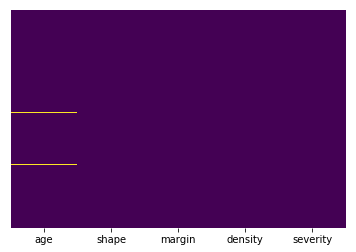

In [45]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [46]:
data["age"]=data["age"].fillna(data['age'].mean())

In [47]:
data.isnull().sum()

age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

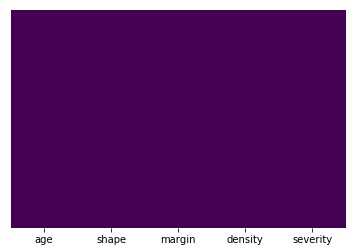

In [48]:
#visualize if there are any null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [49]:
data.head()

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.000000,1
1,43.0,1.0,1.0,2.910734,1
2,58.0,4.0,5.0,3.000000,1
3,28.0,1.0,1.0,3.000000,0
4,74.0,1.0,5.0,2.910734,1


In [50]:
data.shape

(961, 5)

In [58]:
#counting the severity cases
data["severity"].value_counts()

0    516
1    445
Name: severity, dtype: int64

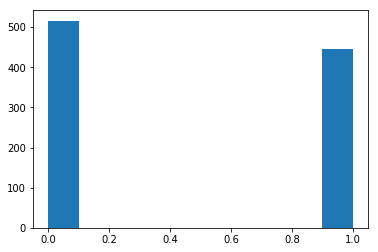

In [61]:
#visualize the severity
plt.hist(data["severity"])
plt.show()

In [51]:
#Getting the correlation
data.corr()

,age,shape,margin,density,severity
age,1.000000,0.359751,0.402749,0.027798,0.430754
shape,0.359751,1.000000,0.718898,0.069924,0.554349
margin,0.402749,0.718898,1.000000,0.100323,0.561230
density,0.027798,0.069924,0.100323,1.000000,0.061535
severity,0.430754,0.554349,0.561230,0.061535,1.000000


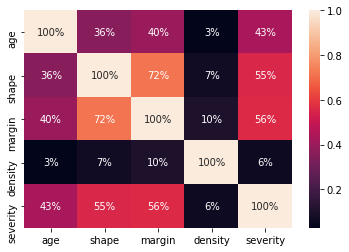

In [70]:
#visualizing the correlation
sns.heatmap(data.corr(),annot=True,fmt='.0%')
plt.show()

# Model Builiding

In [62]:
data.head(1)

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.0,1


In [63]:
data.columns

Index(['age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [163]:
#Indepedent and dependent labels
X = data[['age', 'shape', 'margin', 'density']].values
y = data['severity'].values

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [175]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [177]:
#Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)
log_pred = logistic.predict(X_test_scaled)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [178]:
#knearest neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)

In [179]:
#Decision Tree
tree = DecisionTreeClassifier(random_state=1,criterion="entropy")
tree.fit(X_train_scaled,y_train)
tree_pred = tree.predict(X_test_scaled)

In [180]:
#RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_scaled,y_train)
forest_pred = forest.predict(X_test_scaled)

In [204]:
#SVC
svc = SVC(kernel="linear")
svc.fit(X_train_scaled,y_train)
svc_pred=svc.predict(X_test_scaled)


In [183]:
#Multinomial NB
multi = MultinomialNB()
multi.fit(X_train,y_train)
multi_pred = multi.predict(X_test)

In [184]:
from sklearn.metrics import accuracy_score
print("Logistic:", accuracy_score(y_test,log_pred))
print( "Decision Tree:", accuracy_score(y_test,tree_pred))
print( "Random Forest:", accuracy_score(y_test,forest_pred))
print( "KNN:", accuracy_score(y_test,knn_pred))
print( "SVC:", accuracy_score(y_test,svc_pred))
print( "multi:", accuracy_score(y_test,multi_pred))

Logistic: 0.7958477508650519
Decision Tree: 0.6920415224913494
Random Forest: 0.7335640138408305
KNN: 0.7820069204152249
SVC: 0.7993079584775087
multi: 0.7854671280276817


In [ ]:
from sklearn.model_selection import cross_val_score

In [185]:
#Using cross validation score
def model_scores():
    log_val = cross_val_score(logistic,X,y,scoring='accuracy',cv=10).mean()
    print("Logistic SCore:", log_val)
    tree_val = cross_val_score(tree,X,y,scoring='accuracy',cv=10).mean()
    print("Decision Tree SCore:", tree_val)
    forest_val = cross_val_score(forest,X,y,scoring='accuracy',cv=10).mean()
    print("Random forest SCore:", forest_val)
    knn_val = cross_val_score(knn,X,y,scoring='accuracy',cv=10).mean()
    print("KNN SCore:", knn_val)
    svc_val = cross_val_score(svc,X,y,scoring='accuracy',cv=10).mean()
    print("svc SCore:", svc_val)
    multi_val = cross_val_score(multi,X,y,scoring='accuracy',cv=10).mean()
    print("Multi SCore:", multi_val)

model_scores()

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Logistic SCore: 0.7928833197684934
Decision Tree SCore: 0.7482605353590162
Random forest SCore: 0.7667738289021523
KNN SCore: 0.7772457722915537
svc SCore: 0.7898449086634111
Multi SCore: 0.7438875700850064


### Hyper-parameter tuning

*we will consider
*SVC and RandomForest

In [212]:
from sklearn.model_selection import GridSearchCV

In [206]:
#SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
              
grid_search = GridSearchCV(estimator=svc,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train_scaled,y_train)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [207]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [208]:
grid_search.best_score_

0.8080357142857143

In [209]:
#SVC tuned
svc = SVC(kernel="rbf",gamma=0.1,C=100)
svc.fit(X_train_scaled,y_train)
svc_pred=svc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,svc_pred))

Accuracy: 0.7889273356401384


In [215]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [242]:
#RandomForestClassifier
parameter_distribution = {
    'max_depth':[3,5,10,None],
    "n_estimators":[10,100,200,300,400,500],
    "criterion":['gini','entropy'],
    'bootstrap':[True,False],    
}

In [243]:
random_search = RandomizedSearchCV(estimator=forest,param_distributions=parameter_distribution,
                                   n_jobs=-1,n_iter=40,scoring='accuracy',cv=10)

In [244]:
random_search = random_search.fit(X_train_scaled,y_train)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [246]:
#best parameters
random_search.best_params_

{'n_estimators': 100,
 'max_depth': 3,
 'criterion': 'entropy',
 'bootstrap': True}

In [249]:
random_search.best_score_

0.8050595238095238

In [250]:
#Tuned RandomForest
forest = RandomForestClassifier(n_estimators=100,max_depth=3,criterion='entropy',bootstrap=True)
forest.fit(X_train_scaled,y_train)
forest_pred2 = forest.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,forest_pred2))

Accuracy: 0.8166089965397924


In [ ]:
##Through parameter tuning Random forest has done well!!

# Appling Neural Networks!

In [10]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import rmsprop

In [252]:
data.to_csv("df.csv")

In [4]:
import pandas as pd
df = pd.read_csv("df.csv")
df.head()

,Unnamed: 0,age,shape,margin,density,severity
0,0,67.0,3.0,5.0,3.000000,1
1,1,43.0,1.0,1.0,2.910734,1
2,2,58.0,4.0,5.0,3.000000,1
3,3,28.0,1.0,1.0,3.000000,0
4,4,74.0,1.0,5.0,2.910734,1


In [5]:
df.isnull().sum()

Unnamed: 0    0
age           0
shape         0
margin        0
density       0
severity      0
dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [25]:
X = df[['age', 'shape', 'margin', 'density']].values
y = df[ 'severity'].values

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
df.shape

(961, 6)

In [55]:
print(X.shape)
print(X_scaled.shape)
print(y.shape)

(961, 4)
(961, 4)
(961,)


In [76]:
def model_created():
    model = Sequential()
    model.add(Dense(32,input_dim=4,kernel_initializer='normal',activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [77]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [78]:
classifier = KerasClassifier(build_fn=model_created,nb_epoch=100,verbose=0)

In [79]:
scores = cross_val_score(classifier,X_scaled,y,cv=10)
print(scores.mean())

0.7606743986254296
